# Übung 2 Merkmalsextraktionsverfahren

In dieser Übungseinheit werdet ihr unterschiedliche Merkmalsextraktionsverfahren implementieren.

Für die Bearbeitung dieser Aufgabe benötigt ihr theoretische Kenntnisse für die folgenden Themen: 
- **Harris Corner Detector** 
- **HOG-Features** 
- **SIFT**


**Ziel**: 
Im Zuge der Bearbeitung dieser Aufgabe soll ein tieferes Verständnis der Funktionsweise der oben genannten  Merkmalsextraktionsverfahren erlangt werden.

**Daten**:
Nutzt für die Implementierung der Merkmalsextraktionsverfahren die im Ordner "Bilder" abgelegten Bilddaten (2 - 3 Bilder pro Teilaufgabe).

Beispielbilder der implementierten Verfahren (von links nach rechts): Graustufenbild, Graustufenbild mit Harris-Keypoints, Visualisierung der HOG-Features, Graustufenbild mit SIFT-Keypoints


<img src="E:\\lernen\\TUB\\ss2024\\aBGA2\\stop_example.png" alt="Alternative text" />

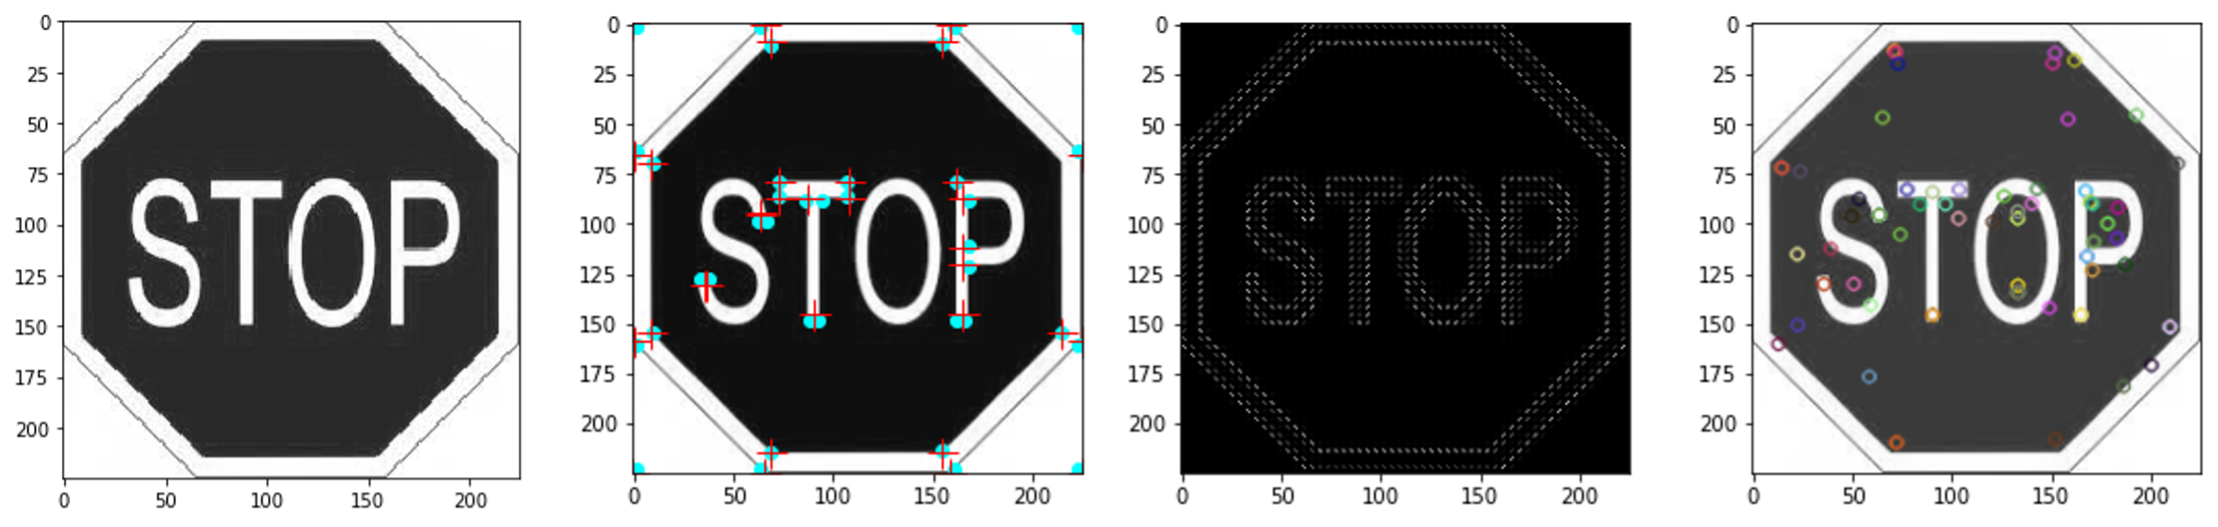

## Imports


**Hinweis Installation von scikit-image-Paket**

Für diejenigen, die auf den eingenen Rechnern arbeiten: scikit-image-Paket 
über das Terminal / anaconda prompt installieren "**conda install scikit-image**"

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data, io, exposure, filters
from skimage.feature import corner_harris, corner_subpix, corner_peaks, hog, corner_fast, match_descriptors, plot_matches
from skimage.feature import haar_like_feature_coord, haar_like_feature, draw_haar_like_feature
from skimage.transform import warp, AffineTransform, rescale, resize
from skimage.draw import ellipse
from scipy.ndimage import gaussian_filter, convolve

## Harris Corner Detector

### Schritt-für-Schritt-Implementierung 

Als erstes sollt ihr mit Hilfe des unten stehenden Kochrezepts jeden einzelnen Schritt der Harris-Funktion implementieren, um die Umsetzung von mathematischen Konzepten wie z.B. parzielle Ableitungen, Strukturmatrix, Determinante und Matrizenoperationen mit Hilfe von Python-Modulen zu üben.


Quelle: S. 346, 16.2.1 Harris Eckendetektor, im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020)
<img src="./ipynb_bilder/harris.png" alt="Alternative text" />

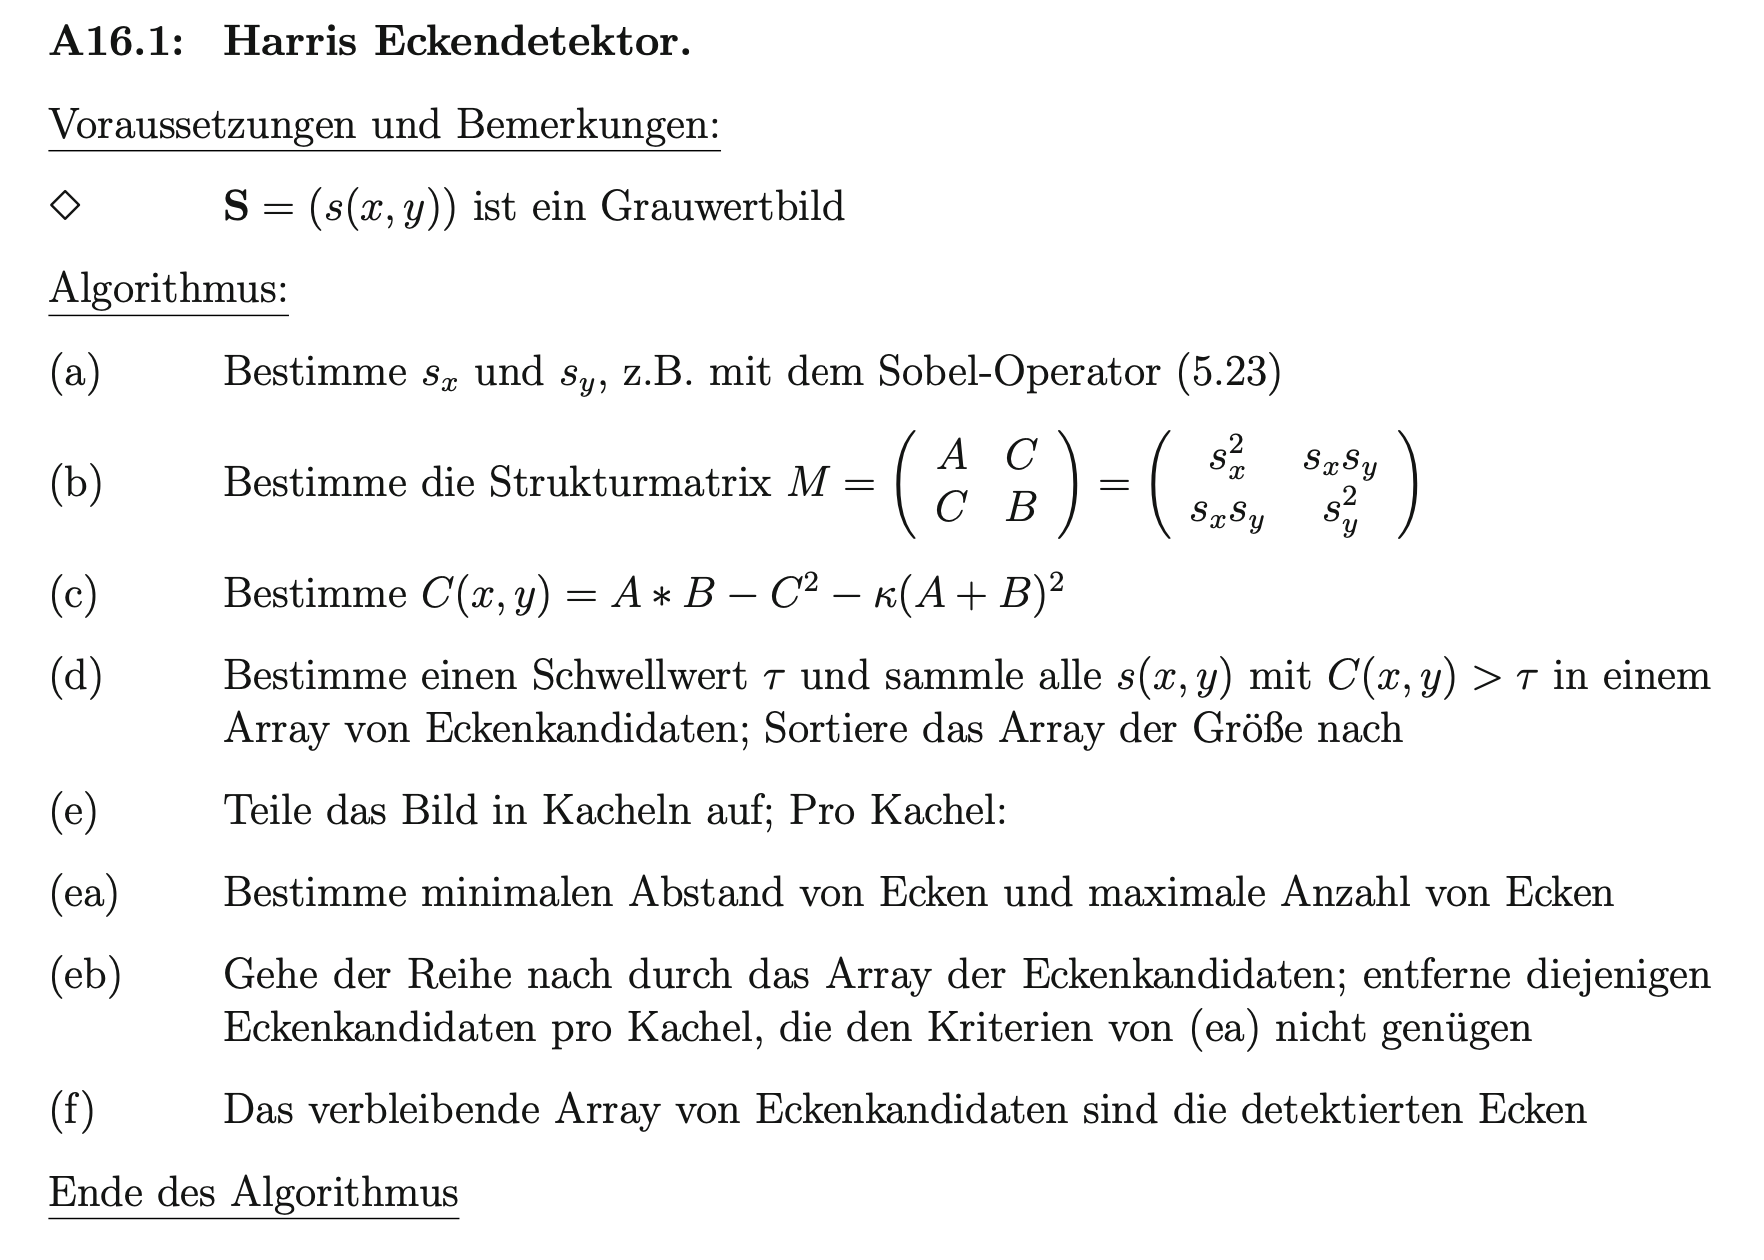

In [2]:
def harris_corners(img, window_size = 3, k=0.04):
    """
    Berechnet die Harris Corner Response Funktion:
    R=Det(M)-k(Trace(M)^2)
        
    Argumente:
        img: ein Graustufenbild
        window_size: Größe der Fenster-Funktion
        k: Empfindlichkeit des Eckendetektors, liegt typischerweise im Bereich [0 0.2]

    Rückgabe:
        harris_resp: Harris Response Bild mit dem shape (height, width)
        
    """

    height, width = img.shape
    window = np.ones((window_size, window_size))

    harris_resp = np.zeros((height, width))

    dx = filters.sobel_v(img)
    dy = filters.sobel_h(img)

    ### TO DO:
    
    # Strukturmatrix
    Ixx = dx**2
    Ixy = dx * dy
    Iyy = dy**2
    # Gaussfilterung
    gIxx = gaussian_filter(Ixx, sigma=window_size)
    gIxy = gaussian_filter(Ixy, sigma=window_size)
    gIyy = gaussian_filter(Iyy, sigma=window_size)
    # Determinante
    detM = gIxx * gIyy - gIxy**2
    # Spur 
    traceM = gIxx + gIyy
    # Harris Corner Response Funktion
    harris_resp = detM - k * (traceM**2)

    return harris_resp

In [8]:
filename = "E:\\lernen\\TUB\\ss2024\\aBGA2\\ub2\\stop.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,3,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
 cv2.destroyAllWindows()

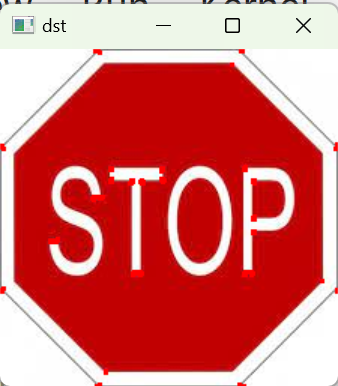

In [26]:
filename = "E:\\lernen\\TUB\\ss2024\\aBGA2\\ub2\\stop.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = harris_corners(gray)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
 cv2.destroyAllWindows()

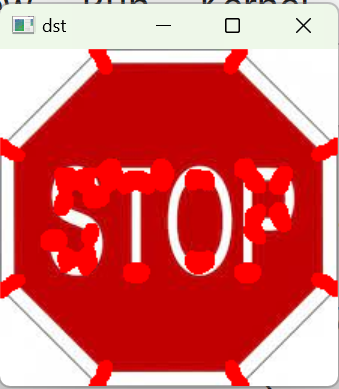

 Unter folgenden Links fidet ihr die Implementierung der Harris Corner Detector Funktionen in der **scikit-image**-Bibliothek ([Corner Detection](https://scikit-image.org/docs/0.17.x/auto_examples/features_detection/plot_corner.html?highlight=corner%20detection)) und in der **OpenCV**-Bibliothek ([Harris Corner Detection](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)). 

Führt Harris Corner Detection mit Hilfe der in diesen Bibliotheken enthaltenen Funktionen durch und vergleicht die Ergebnisse eurer Implementierung mit den Ergebnissen, die ihr mit den bereitgestellten Funktionen bekommt. Stellt ihr Unterschiede fest, versucht diese zu deuten. 



## HOG (Histogram of Oriented Gradients)

Berechnet für 2-3 Bilder HOG-Features mit der in der scikit-image-Bibliothek implementierten hog-Funktion und visualisiert die berechneten Features.
Verwendet zunächst Defaultparameter der HOG-Funktion. 
Überlegt euch anschließend, welche Parameter angepasst werden können, um das Ergebnis zu optimieren. Berechnet HOG-Features mit angepassten Parametern und vergleicht die Ergebnisse. 

**Kontrollfrage**: Wie wird die Größe des HOG-Feature-Vektors festgelegt bzw. Wovon hängt sie ab?

Theoretische Grundlagen: 
Zusätzlich zu den in der Vorlesung vermittelten theoretischen Grundlagen könnt ihr euch das Kapitel 16.3.3 HOG - Histogram of Oriented Gradients S. 362 im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020) anschauen.
<img src="./ipynb_bilder/hog.png" alt="Alternative text" />

Die **scikit-image**-Implementierung findet ihr unter den folgenden Links:
- [Histogram of Oriented Gradients](https://scikit-image.org/docs/0.17.x/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)
- [API reference for HOG](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog)
- [Ein Beispiel mit Code für ein tieferes Verständnis](https://www.thepythoncode.com/article/hog-feature-extraction-in-python)

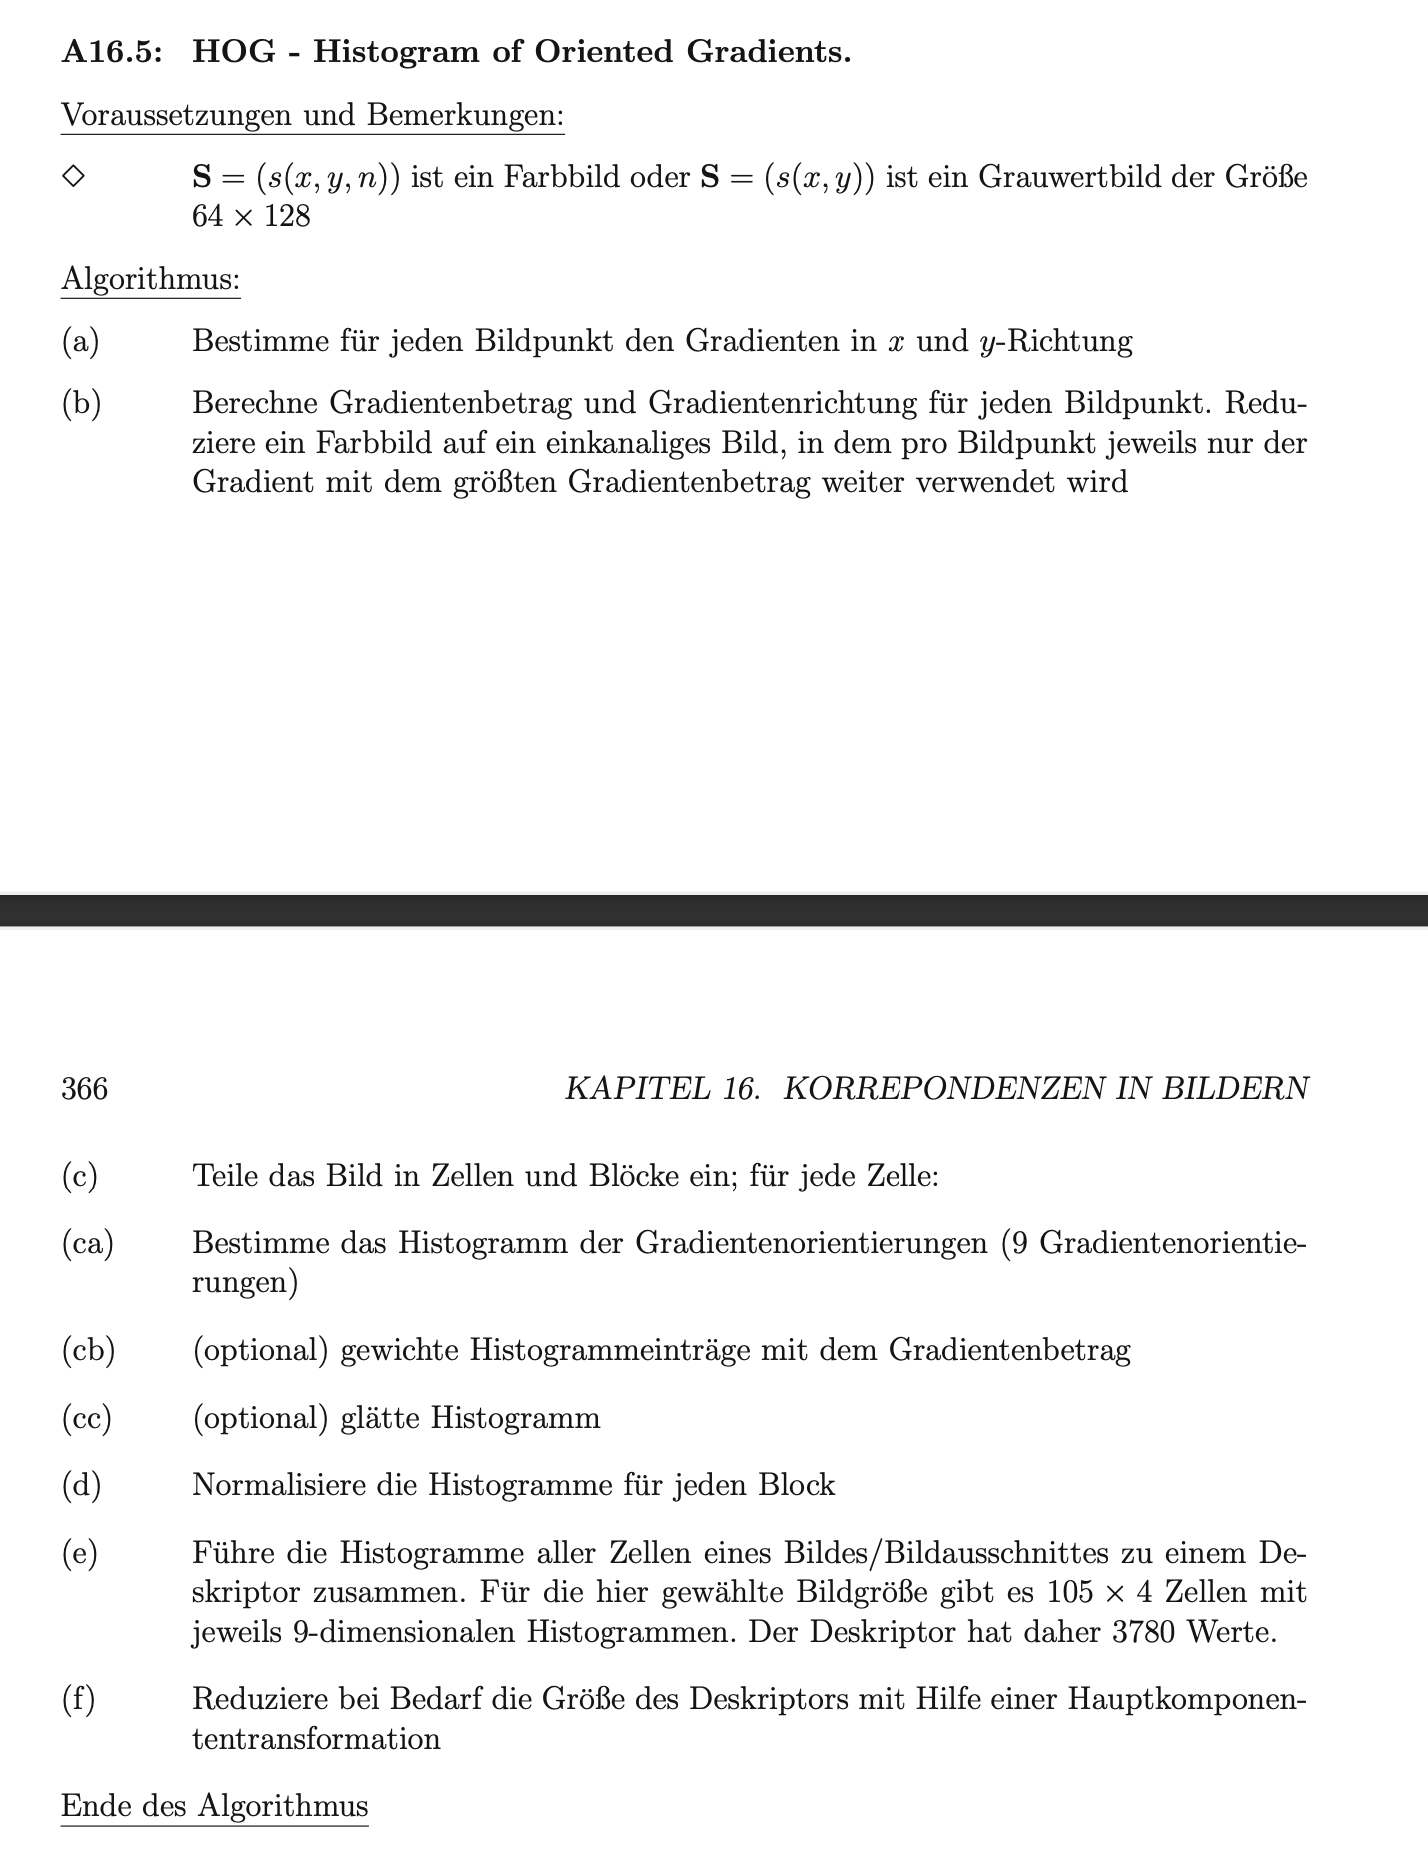

In [ ]:
## hier kommt euer Code

In [ ]:
image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## SIFT (Scale-Invariant Feature Transform)

Berechnet für 2-3 Bilder SIFT-Features mit der in der OpenCV-Bibliothek implementierten sift-Funktion und visualisiert die berechneten Features.
Verwendet zunächst Defaultparameter der HOG-Funktion. 
Übeerlegt euch anschließend, welche Parameter und angepasst werden können, um das Ergebnis zu optimieren. Berechnet HOG-Features mit angepassten Parametern und vergleicht die Ergebnisse. 

**Kontrollfrage**: Kann die Größe des Descriptors variert werden? Wenn die Antwort ist "ja", wie, wenn die Antwort ist "nein" warum?

Theoretische Grundlagen: 
Zusätzlich zu den in der Vorlesung vermittelten theoretischen Grundlagen könnt ihr euch das Kapitel 16.3.1 SIFT - Scale Invariant Feature Transform S. 351 im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020) anschauen.
<img src="./ipynb_bilder/sift.png" alt="Alternative text" />

Die **openCV**-Implementierung findet ihr unter dem folgenden Link [Introduction to SIFT](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html).
[Ein Beispiel mit Code für ein tieferes Verständnis](https://www.thepythoncode.com/article/sift-feature-extraction-using-opencv-in-python)

In [ ]:
## hier kommt euer Code

## Bonus - Feature Matching
Das Ziel ist die Features, die aus zwei Bildern extrahiert wurden, zuzuordnen. Dafür gibt es unterschiedliche Methoden. 
Unter folgendem [Link](https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html) findet ihr eine Dokumentation dazu (OpenCV-Bibliothek). 

Anbei ein Beispiel, welches mit dem **Brute-Force Matcher** unter Nutzung der Defayult-Parameter generiert wurde. Das Prinzip des Brute-Force Matchers ist einfach und basiert auf der Berechnung des Abstandes (z.B. L2-Norm) zwischen den Keypoints und Bestimmung des minimalen Abstandes. 
Ihr könnt gerne versuchen den Brute-Forse Matcher für die sift-Deskriptoren der Zangenbilder (Industrial-5.jpg und Industrial-8.jpg) anzuwenden oder ein anderes Bilderpaar aus dem Ordner "Bilder" verwenden. 
<img src="./ipynb_bilder/bfmatcher.png" alt="Alternative text" />